# <center> THE TITANIC DATASET ANALYSIS </center>

![Titanic 2](https://img.20mn.fr/CErtKaVbRdGYu9BfHjihKA/640x410_leonardo-dicaprio-kate-winslet-titanic.jpg)

In [1]:
from sklearn import preprocessing
from sklearn import datasets
import sklearn.model_selection as ms
import sklearn.metrics as sklm
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import numpy.random as nr
import seaborn as sns

%matplotlib inline

In [2]:
data = pd.read_csv('train.csv')
data2 = pd.read_csv('gender_submission.csv')
print(data.shape, '\n')
print(data.dtypes)
data.drop(['PassengerId', 'Cabin', 'Ticket', 'Name'], inplace = True, axis=1)

(891, 12) 

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [3]:
print(data.describe().apply(lambda s: s.apply(lambda x: format(x, 'f'))))
data.head()

         Survived      Pclass         Age       SibSp       Parch        Fare
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std      0.486592    0.836071   14.526497    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   20.125000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%      1.000000    3.000000   38.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [4]:
for i in data.columns:
        print(i)
        print(data[i].value_counts())

Survived
0    549
1    342
Name: Survived, dtype: int64
Pclass
3    491
1    216
2    184
Name: Pclass, dtype: int64
Sex
male      577
female    314
Name: Sex, dtype: int64
Age
24.00    30
22.00    27
18.00    26
19.00    25
30.00    25
         ..
55.50     1
70.50     1
66.00     1
23.50     1
0.42      1
Name: Age, Length: 88, dtype: int64
SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64
Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64
Fare
8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
8.4583      1
9.8375      1
8.3625      1
14.1083     1
17.4000     1
Name: Fare, Length: 248, dtype: int64
Embarked
S    644
C    168
Q     77
Name: Embarked, dtype: int64


In [5]:
print(data.nunique(axis=0))
for i in data.columns:
    if data[i].isnull().sum() / len(data) >0 :
        print(i)
        print(round(data[i].isnull().sum() / len(data), 2))
#percentage of missing values in a column

print('Column - Type - Number of modalities - Percentage of NAN')
print('----------------------------------------------------------------------')
for col in data.columns:
    print('%s - %s - %s - %s'%(col, data[col].dtypes, len(data[col].unique()), round(data[col].isnull().sum() / len(data), 3)))
print('----------------------------------------------------------------------')

Survived      2
Pclass        3
Sex           2
Age          88
SibSp         7
Parch         7
Fare        248
Embarked      3
dtype: int64
Age
0.2
Embarked
0.0
Column - Type - Number of modalities - Percentage of NAN
----------------------------------------------------------------------
Survived - int64 - 2 - 0.0
Pclass - int64 - 3 - 0.0
Sex - object - 2 - 0.0
Age - float64 - 89 - 0.199
SibSp - int64 - 7 - 0.0
Parch - int64 - 7 - 0.0
Fare - float64 - 248 - 0.0
Embarked - object - 4 - 0.002
----------------------------------------------------------------------


In [6]:
# import re as re
# def get_title(name):
#     title_search = re.search(' ([A-Za-z]+)\.', name)
#     # If the title exists, extract and return it.
#     if title_search:
#         return title_search.group(1)
#     return ""

# for d in data:
#     data['Title'] = data['Name'].apply(get_title)

# print(data['Title'], data['Sex'])

In [7]:
# for d in data:
#     data['Title'] = data['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
#     'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Misc')

#     data['Title'] = data['Title'].replace('Mlle', 'Miss')
#     data['Title'] = data['Title'].replace('Ms', 'Miss')
#     data['Title'] = data['Title'].replace('Mme', 'Mrs')

# print (data[['Title', 'Survived']].groupby(['Title'], as_index=False).mean())

In [8]:
data[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


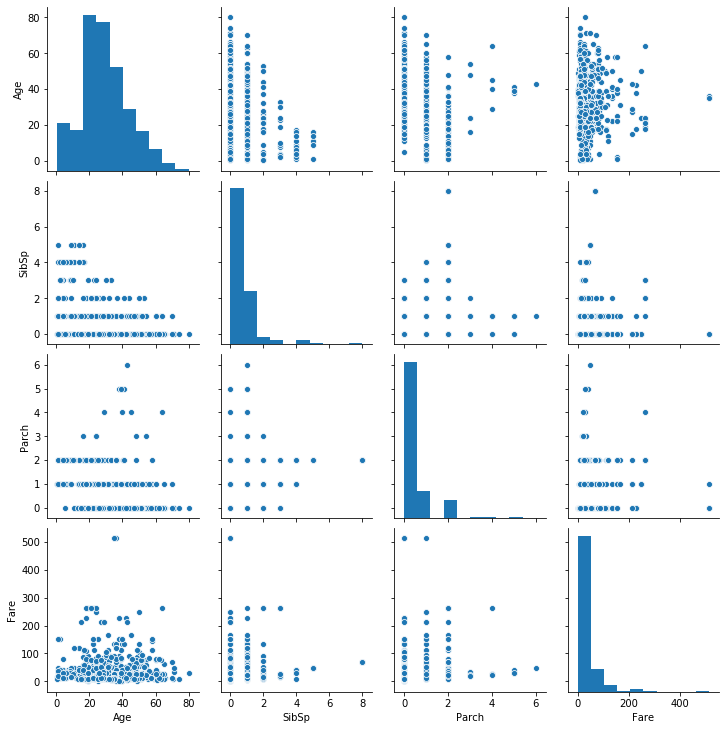

In [16]:
data.drop_duplicates()
X = data.drop('Survived', axis=1)
y = data['Survived']
num = X[['Age', 'SibSp', 'Parch', 'Fare']]

sns.pairplot(num)


In [ ]:
from sklearn.compose import make_column_selector

cat = X[['Sex', 'Pclass', 'Embarked']]
num = X[['Age', 'SibSp', 'Parch', 'Fare']]
num.tail(5)

# num = data[make_column_selector(dtype_include=np.number)]
# cat = data[make_column_selector(dtype_exclude=np.number)]

In [ ]:
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.preprocessing import RobustScaler
from  sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder

imputer = KNNImputer(n_neighbors=4)
num = imputer.fit_transform(num)


# num_pipeline = make_pipeline(KNNImputer(n_neighbors=3), RobustScaler())
# cat_pipeline = make_pipeline(KNNImputer(n_neighbors=3), OneHotEncoder())

In [ ]:
data = np.hstack((num, cat))
data = pd.DataFrame(data=data)
data.dropna(inplace=True)